# SVM Noise Robustness Analysis on Red Wine Quality Data

## Import necessary modules

In [25]:
import pandas as pd                                                # To load and manipulate data
import numpy as np                                                # For data manipulation
import matplotlib.pyplot as plt                                  # For visualize

from sklearn.model_selection import train_test_split            # To split data into training data and test data
from sklearn.preprocessing import StandardScaler               # To standardize/normalize data
from sklearn.metrics import confusion_matrix                  # To create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay           # To visualize our confusion matrix
from sklearn.metrics import accuracy_score                  # To get accuracy score
from sklearn.metrics import f1_score                       # To get f1_score

from sklearn.svm import SVC                               # To use SVC

## Load dataset

In [5]:
df = pd.read_csv('redwinequality.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Checking for missing values...

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There exists no null values.

## Setting targets and features

In [9]:
x = df.drop("quality", axis=1)  # features (independent variables) -> inputs used to predict something.
y = df.quality                 # target (dependent variable) -> depends on the features (quality).

## Splitting the data

Now we split the data into training and testing data.

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## Scaling data

In [11]:
# An object is created to use the StandardScaler() module
scaler = StandardScaler()

# Fit on training data only
x_train = scaler.fit_transform(x_train)  # learn(fit)+ scale(transform)

# Apply to test data
x_test = scaler.transform(x_test)       # scale only

Anything that “learns” from data must be fit ONLY on training data.

**DO NOT** fit_transform the x_test -> causes data leakage.Because in real life:You won’t know the future data’s average!

## Applying SVM

In [12]:
# using linear svc
svc_lin = SVC(kernel = 'linear',random_state=42)
svc_lin.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
# using rbf
svc_rbf = SVC(kernel='rbf',random_state=42)
svc_rbf.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
print('Training Accuracy\n')
print('Linear Classifier : ',svc_lin.score(x_train,y_train))
print('RBF Classifier : ',svc_rbf.score(x_train,y_train))

Training Accuracy

Linear Classifier :  0.5904920767306089
RBF Classifier :  0.6713928273561302


## Adding Noise

In [31]:
# Function to add noise
def add_gaussian_noise(x, noise_level):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=x.shape)
    return x + noise

In [32]:
# define noise
noise_levels = [0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
accuracy_scores = []
f1_scores = []

for noise in noise_levels:
    # Add noise ONLY to features
    x_train_noisy = add_gaussian_noise(x_train, noise)
    x_test_noisy = add_gaussian_noise(x_test, noise)

    # RBF SVM
    clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    clf.fit(x_train_noisy, y_train)

    y_pred = clf.predict(x_test_noisy)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='weighted')

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Noise: {noise:.2f} | Accuracy: {acc:.3f} | F1: {f1:.3f}")

Noise: 0.00 | Accuracy: 0.627 | F1: 0.601
Noise: 0.02 | Accuracy: 0.620 | F1: 0.594
Noise: 0.04 | Accuracy: 0.623 | F1: 0.595
Noise: 0.06 | Accuracy: 0.618 | F1: 0.590
Noise: 0.08 | Accuracy: 0.608 | F1: 0.580
Noise: 0.10 | Accuracy: 0.605 | F1: 0.579
Noise: 0.12 | Accuracy: 0.583 | F1: 0.556
Noise: 0.14 | Accuracy: 0.605 | F1: 0.580
Noise: 0.16 | Accuracy: 0.618 | F1: 0.591
Noise: 0.18 | Accuracy: 0.583 | F1: 0.557
Noise: 0.20 | Accuracy: 0.585 | F1: 0.558


### Identify the breaking point

In [33]:
for n, acc in zip(noise_levels, accuracy_scores):
    if acc < 0.65:
        print(f"⚠️ Breakdown starts at noise level ≈ {n}")
        break


⚠️ Breakdown starts at noise level ≈ 0.0


## Visualizing the Results

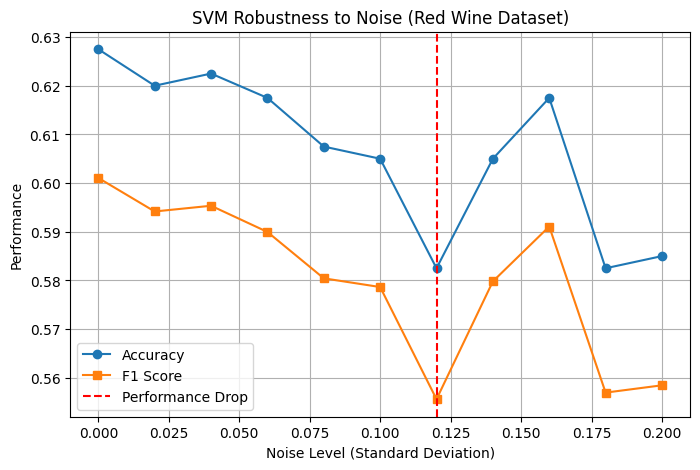

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracy_scores, marker='o', label='Accuracy')
plt.plot(noise_levels, f1_scores, marker='s', label='F1 Score')

plt.axvline(x=noise_levels[accuracy_scores.index(min(accuracy_scores))],
            color='red', linestyle='--', label='Performance Drop')

plt.xlabel("Noise Level (Standard Deviation)")
plt.ylabel("Performance")
plt.title("SVM Robustness to Noise (Red Wine Dataset)")
plt.legend()
plt.grid(True)
plt.show()


## Observations

**What happened as noise increased?**

- Accuracy and F1 decline gradually at first
- Sharp drop after a threshold (breakdown point)
- RBF SVM tolerates small noise but struggles with heavy corruption

**Why does the model fail?**

- Noise distorts feature distances
- RBF kernel depends heavily on Euclidean distance
- Decision boundary becomes unstable

**Evaluation Metrics**

The following metrics were used to assess performance:
- Accuracy: Overall correctness of predictions.
- F1-score: Balance between precision and recall, especially useful for class imbalance.

These metrics provide insight into both general performance and class-level reliability.

**Key Takeaways**

- SVM performance degrades with feature corruption
- RBF kernels are sensitive to noise